# 06wk-023: 취업+각종영어점수, Lasso

최규빈  
2023-10-05

# 1. 강의영상

# 2. Imports

In [233]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt

# 3. Data

In [234]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_manytoeic.csv")
df

# 4. 분석

`-` 적용할 방법: Lasso

In [242]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)

In [243]:
X = df_train.drop(['employment_score'],axis=1)
XX = df_test.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
yy = df_test[['employment_score']]

In [244]:
prdtr = sklearn.linear_model.Lasso()

In [245]:
prdtr.fit(X,y)
#prdtr.coef_

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.574e-01, tolerance: 1.988e-01
  model = cd_fast.enet_coordinate_descent(

In [246]:
prdtr.score(X,y)

In [247]:
prdtr.score(XX,yy)

# 5. Lasso의 비법

`-` LinearRegression vs Lasso

In [296]:
prdtr_list = [sklearn.linear_model.LinearRegression(), sklearn.linear_model.Lasso()]

In [298]:
for prdtr in prdtr_list:
    prdtr.fit(X,y)

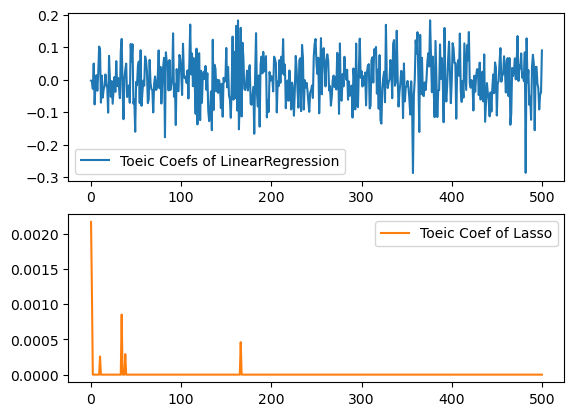

In [299]:
fig,ax = plt.subplots(2)
ax[0].plot(prdtrs[0].coef_.reshape(-1)[1:],label='Toeic Coefs of LinearRegression',color='C0')
ax[0].legend()
ax[1].plot(prdtrs[1].coef_.reshape(-1)[1:],label='Toeic Coef of Lasso',color='C1')
ax[1].legend()

`-` Lasso는 훨씬 Spare한 Coef를 가진다.

In [301]:
(abs(prdtr_list[0].coef_)>0).sum() # 502개 모두 값이 있음..

In [302]:
(abs(prdtr_list[1].coef_)>0).sum() # 대부분0이고 7개정도만 0이 아님

# 6. 하이퍼파라메터

In [329]:
alphas = np.linspace(0,1,100)
alphas

In [330]:
prdtr_list = [sklearn.linear_model.Lasso(alpha=a) for a in alphas]
for prdtr in prdtr_list:
    prdtr.fit(X,y)

In [331]:
nonzero_coefs = [abs(prdtr.coef_>0).sum() for prdtr in prdtr_list] 

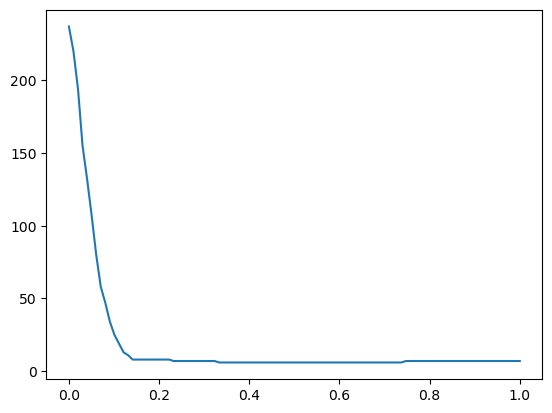

In [333]:
plt.plot(alphas, nonzero_coefs)

-   alpha가 커질수록 0인 coef가 많아짐